
Linear Regression Results:
R² Score: 0.8437600885956081
MAE: 1.358005769961511
RMSE: 1.7709620403197122

Decision Tree Regressor Results:
R² Score: 0.49290626676122107
MAE: 2.5008785983398694
RMSE: 3.1904899588435955


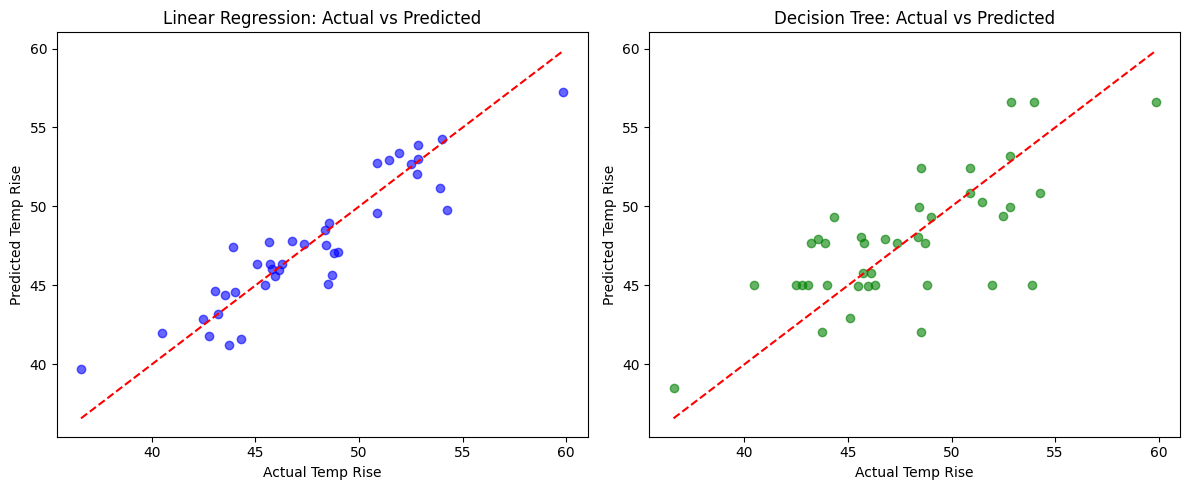


Prediction for New Data:
Linear Regression: 49.92456710861345 °C
Decision Tree: 51.90846078003174 °C


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


np.random.seed(42)
n_samples = 200

voltage = np.random.uniform(200, 250, n_samples)           # in Volts
current = np.random.uniform(5, 15, n_samples)              # in Amps
ambient_temp = np.random.uniform(20, 35, n_samples)        # °C
load = np.random.uniform(50, 100, n_samples)               # %
running_time = np.random.uniform(10, 120, n_samples)       # minutes

# Temperature rise model (synthetic physics-inspired relation)
temp_rise = (
    0.05 * voltage +
    0.8 * current +
    0.6 * ambient_temp +
    0.1 * load +
    0.07 * running_time +
    np.random.normal(0, 2, n_samples)  # noise
)

df = pd.DataFrame({
    "Voltage": voltage,
    "Current": current,
    "AmbientTemp": ambient_temp,
    "Load": load,
    "RunningTime": running_time,
    "TempRise": temp_rise
})

# ---------------------------
# Step 2: Train/Test Split
# ---------------------------
X = df[["Voltage", "Current", "AmbientTemp", "Load", "RunningTime"]]
y = df["TempRise"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# Step 3: Linear Regression Model
# ---------------------------
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

# ---------------------------
# Step 4: Decision Tree Regressor
# ---------------------------
tree_model = DecisionTreeRegressor(random_state=42, max_depth=5)  # limit depth to avoid overfitting
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# ---------------------------
# Step 5: Evaluation
# ---------------------------
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Results:")
    print("R² Score:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

evaluate_model("Linear Regression", y_test, y_pred_lin)
evaluate_model("Decision Tree Regressor", y_test, y_pred_tree)

# ---------------------------
# Step 6: Visualization - Comparison
# ---------------------------
plt.figure(figsize=(12,5))

# Linear Regression
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_lin, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")
plt.xlabel("Actual Temp Rise")
plt.ylabel("Predicted Temp Rise")
plt.title("Linear Regression: Actual vs Predicted")

# Decision Tree
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_tree, color="green", alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")
plt.xlabel("Actual Temp Rise")
plt.ylabel("Predicted Temp Rise")
plt.title("Decision Tree: Actual vs Predicted")

plt.tight_layout()
plt.show()

# ---------------------------
# Step 7: Predict for New Data
# ---------------------------
new_data = pd.DataFrame({
    "Voltage": [230],
    "Current": [10],
    "AmbientTemp": [30],
    "Load": [80],
    "RunningTime": [60]
})

print("\nPrediction for New Data:")
print("Linear Regression:", lin_model.predict(new_data)[0], "°C")
print("Decision Tree:", tree_model.predict(new_data)[0], "°C")
